In [169]:
# [X] TODO: refactor notebook for simplicity (use columns, not indexes).
# [ ] TODO: use shape_id frequencies to get route_id's representative shape.
# [X] TODO: add last point in shapes as a way for differentiating directions.
# [X] TODO: calculate centroid to automatize getting time zones.
# [X] TODO: create main & auxiliary functions, using typer/logger.
# [ ] TODO: publish repository in Transapp's GitHub account.
# [ ] TODO: use mapmatching algorithms for correcting paths.
# [ ] TODO: algorithm for selecting stops in round-trips.
# [ ] TODO: projection algorithm.

In [170]:
from matplotlib import pyplot as plt
from shapely import LineString, Point

import speed_visualizer.utils as sv

In [171]:
route_id = 468
direction_id = 0
time_interval = 0

In [172]:
shapes_trips_dict = sv.get_shapes_dict(route_id, direction_id)

print("Holds information of the following shapes:", list(shapes_trips_dict.keys()))

Holds information of the following shapes: ['1122123218']


In [173]:
# Idea: iterate for each shape & trip in selected route-direction and create its folder with html files.

shape_id = list(shapes_trips_dict.keys())[0]
trip_id = shapes_trips_dict[shape_id][0]

print(f"trip : {trip_id}, shape : {shape_id}")

trip : 073ac436-0-29bd321d-9, shape : 1122123218


In [174]:
curve_geo, curve_utm = sv.get_shapes_coordinates(shape_id)

In [175]:
stops_geo, stops_utm = sv.get_stops_coordinates(trip_id)

In [176]:
stops_utm

,stop_id,stop_name,stop_x,stop_y
0,120-1,Av. Baquedano esq. Gabriela Mistral,756180.051081,5.941206e+06
1,120-5,Av. Baquedano esq. Pablo Neruda,756433.884318,5.941397e+06
2,120-6,Av. Baquedano esq. Cabildo,756537.416618,5.941472e+06
3,120-7,Av. Baquedano esq. Entrada a Santuario,756956.581580,5.941812e+06
4,107-4,Erasmo Escala esq. Conde del Maule,756843.936777,5.942542e+06
5,116-1,Mariano Egana esq. Juan Martinez de Rosas,756675.336438,5.942996e+06
6,107-2,Erasmo Escala esq. Marchant,757038.562307,5.943347e+06
7,107-1,Erasmo Escala esq. General Velasquez,757072.908984,5.943472e+06
8,54-1,El Tejar esq. Pje. Ocho,757243.125010,5.943556e+06
9,54-3,El Tejar esq. Av. O'Higgins,757646.074630,5.943621e+06


In [177]:
def get_projected_stop_point(curve_utm_, stops_utm_):
    """Given a dataframe with utm (x,y) coordinates and a linestring, gets another dataframe
    with points projected in curve. """

    def _project_in_curve(ls, x, y):
        """Auxiliary function for projecting points in curve."""

        pnt = Point(x, y)
        dst = ls.project(pnt)
        prj = ls.interpolate(dst)

        lat_, lon_ = sv.utm_point_to_latlon(prj.x, prj.y, 18, 'H')

        return lat_, lon_

    _project = lambda row: _project_in_curve(LineString(curve_utm_), row["stop_x"], row["stop_y"])

    points_in_curve = stops_utm_[["stop_id", "stop_name"]]
    points_in_curve[["stop_lat", "stop_lon"]] = stops_utm_.apply(_project, axis="columns", result_type="expand")

    return points_in_curve


points_in_curve = get_projected_stop_point(curve_utm, stops_utm)

C:\Users\diego\AppData\Local\Programs\Python\Python39\lib\site-packages\shapely\linear.py:90: RuntimeWarning:

invalid value encountered in line_locate_point

C:\Users\diego\AppData\Local\Temp\ipykernel_13384\3040044656.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



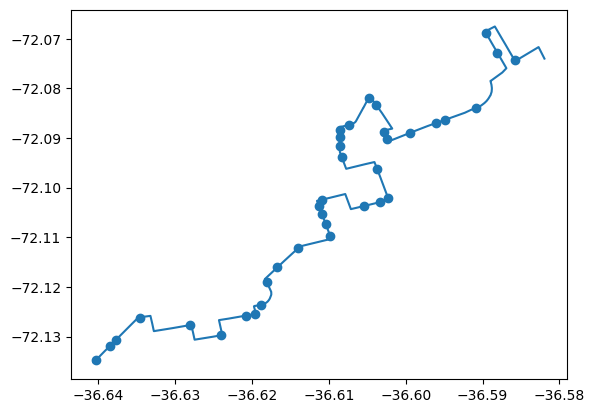

In [178]:
sv.show_curve_with_stops(curve_geo, points_in_curve)

In [179]:
curve_geo

,shape_pt_lat,shape_pt_lon
0,-36.640620,-72.135200
1,-36.640620,-72.135200
2,-36.640620,-72.135200
3,-36.640380,-72.134830
4,-36.640290,-72.134680
...,...,...
420,-36.582810,-72.071760
421,-36.582724,-72.071693
422,-36.582724,-72.071693
423,-36.582720,-72.071690


In [180]:
direction = "ida" if direction_id == 0 else "vuelta"

sv.generate_stop_matching_evaluation_map(curve_geo, points_in_curve, f"{route_id}_{direction}")

In [181]:
from shapely.ops import split


def shape_partition(linestring_, stop_points_):
    partitions = []

    for point in stop_points_:
        print(point)
        print(linestring_.interpolate(linestring_.project(point)))

        partition = split(linestring_, linestring_.interpolate(linestring_.project(point)))
        linestring_ = list(partition.geoms)[0]
        line_next = list(partition.geoms)[1]

        partitions += [linestring_]

        linestring_ = line_next

    return partitions + [linestring_]

In [182]:
line_ = LineString([(1, 2), (2, 3), (3, 4), (4, 5)])
points_ = [Point(2, 3), Point(3, 4)]

partitions_ = shape_partition(line_, points_)
partitions_

POINT (2 3)
POINT (2 3)
POINT (3 4)
POINT (3 4)


[<LINESTRING (1 2, 2 3)>, <LINESTRING (2 3, 3 4)>, <LINESTRING (3 4, 4 5)>]

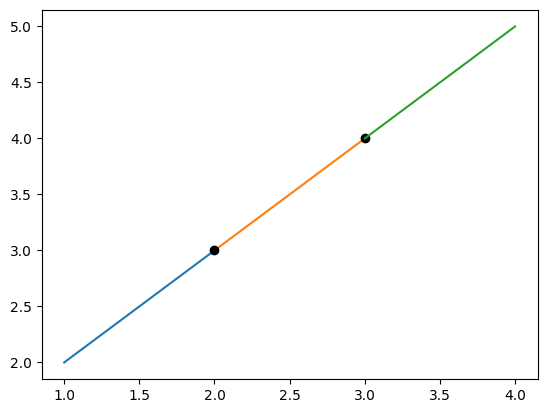

In [183]:
def plot_utm_shapes_partitions(partitions_, points_):
    xs = [point.x for point in points_]
    ys = [point.y for point in points_]

    # partitioned shape
    for order, partition_ in enumerate(partitions_):
        plt.plot(*partition_.xy, zorder=order)

    # stops
    plt.scatter(xs, ys, color="black")

    plt.show()


plot_utm_shapes_partitions(partitions_, points_)

In [184]:
line = LineString(curve_utm)
stop = [Point(759501.4941490631, 5942389.511932061)]

partition = shape_partition(line, stop)

POINT (759501.4941490631 5942389.511932061)
POINT (759132.4204768445 5944308.824860569)


C:\Users\diego\AppData\Local\Programs\Python\Python39\lib\site-packages\shapely\linear.py:90: RuntimeWarning:

invalid value encountered in line_locate_point



In [185]:
curve_geo

,shape_pt_lat,shape_pt_lon
0,-36.640620,-72.135200
1,-36.640620,-72.135200
2,-36.640620,-72.135200
3,-36.640380,-72.134830
4,-36.640290,-72.134680
...,...,...
420,-36.582810,-72.071760
421,-36.582724,-72.071693
422,-36.582724,-72.071693
423,-36.582720,-72.071690


In [186]:
from speed_visualizer.geometry.line_class import Segment
from speed_visualizer.geometry.point_class import Point

segments = []

n = curve_geo.axes[0].size

distance_ab = 0

for i in range(0, n - 1):
    # initial point
    lat_a, lon_a = curve_geo.iloc[i, 0], curve_geo.iloc[i, 1]
    point_a = Point(lat_a, lon_a)

    # final point
    lat_b, lon_b = curve_geo.iloc[i + 1, 0], curve_geo.iloc[i + 1, 1]
    point_b = Point(lat_b, lon_b)

    segments += [Segment(point_a, point_b, distance_ab, i)]

    # distances
    distance_ab += point_a.distance(point_b)

for i in range(5):
    print(segments[i])

-36.64062, -72.1352 -> -36.64062, -72.1352, seq: 0, prev_dist: 0, length: 0.0
-36.64062, -72.1352 -> -36.64062, -72.1352, seq: 1, prev_dist: 0.0, length: 0.0
-36.64062, -72.1352 -> -36.64038, -72.13483, seq: 2, prev_dist: 0.0, length: 42.463227933591725
-36.64038, -72.13483 -> -36.64029, -72.13468, seq: 3, prev_dist: 42.463227933591725, length: 16.716493661387304
-36.64029, -72.13468 -> -36.64027, -72.13465, seq: 4, prev_dist: 59.17972159497903, length: 3.481082362081365


In [187]:
from speed_visualizer.geometry.point_class import StopPoint

stop_points = []

n = stops_geo.axes[0].size

for i in range(0, n):
    # stop point
    lat, lon = stops_geo.iloc[i, 2], stops_geo.iloc[i, 3]
    stop_id = stops_geo.iloc[i, 0]

    stop_points += [StopPoint(lat, lon, stop_id)]

for i in range(5):
    print(stop_points[i])

-36.64028292, -72.13458802
-36.63849471, -72.13181589
-36.63779669, -72.13068408
-36.63462353, -72.1261149
-36.62807479, -72.12761771


In [188]:
DISTANCE_THRESHOLD = 25

In [189]:
def _get_distances_from_segments(p, segments_, prev_dist=None):
    for segment in segments_:
        aux_dist, aux_proj = segment.en_route_distances(p)
        # first check if segment is valid compared to the previous en route distance
        if (prev_dist is not None and prev_dist <= aux_proj) or prev_dist is None:
            # check if segment is near enough the point
            if aux_dist <= DISTANCE_THRESHOLD:
                # this is the segment
                return aux_dist, aux_proj
    return None, None

In [190]:
_get_distances_from_segments(stop_points[1], segments)

ZeroDivisionError: float division by zero

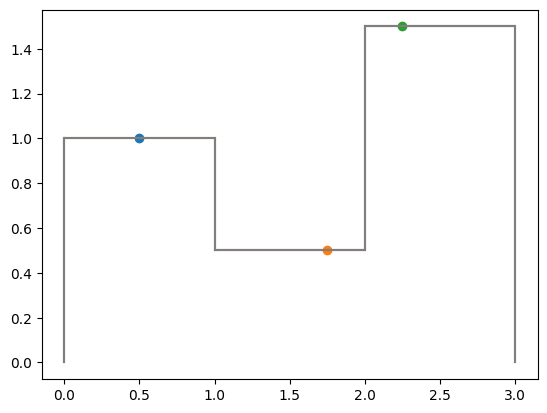

In [192]:
import shapely as sp

line = LineString([[0.0, 0.0], [0.0, 1.0], [1.0, 1.0], [1.0, 0.5], [2.0, 0.5], [2.0, 1.5], [3.0, 1.5], [3.0, 0.0]])

segments = []

segments += [LineString([[0.0, 0.0], [0.0, 1.0]])]  #s1
segments += [LineString([[0.0, 1.0], [1.0, 1.0]])]  #s2
segments += [LineString([[1.0, 1.0], [1.0, 0.5]])]  #s3
segments += [LineString([[1.0, 0.5], [2.0, 0.5]])]  #s4
segments += [LineString([[2.0, 0.5], [2.0, 1.5]])]  #s5
segments += [LineString([[2.0, 1.5], [3.0, 1.5]])]  #s6
segments += [LineString([[3.0, 1.5], [3.0, 0.0]])]  #s7

points = []

points += [sp.Point(0.50, 1.00)]
points += [sp.Point(1.75, 0.50)]
points += [sp.Point(2.25, 1.50)]

for segment in segments:
    plt.plot(*segment.xy)

for point in points:
    plt.scatter(point.x, point.y)

plt.plot(*line.xy)

LINESTRING (0 0, 0 1, 0 1, 0.5 1)
LINESTRING (0.5 1, 1 1, 1 1, 1 0.5, 1 0.5, 1.75 0.5)
LINESTRING (1.75 0.5, 2 0.5, 2 0.5, 2 1.5, 2 1.5, 2.25 1.5)
LINESTRING (2.25 1.5, 3 1.5, 3 1.5, 3 0)


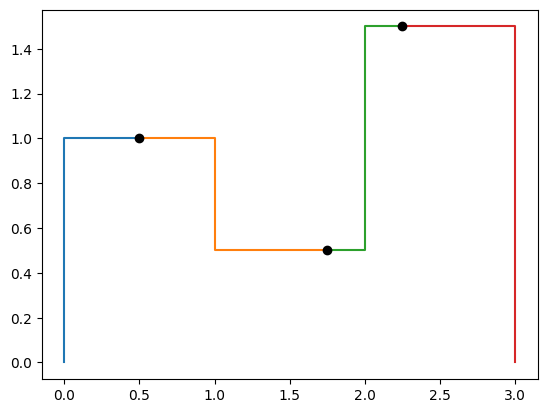

In [193]:
# Creador de segmentos

new_segments = []
new_segment = []

# Iteradores

i = 0
j = 0

# Límites

n = len(segments)  # considera todos en orden
m = len(points)  # considera todos en orden

# Distancia

distance_prev = 0

while i <= n and j <= m:

    if i == n:
        new_segments += [LineString(new_segment)]
        break

    if j == m:

        while i < n:
            segment = segments[i]

            point_a = segment.coords[0]
            point_b = segment.coords[-1]

            new_segment += [point_a]
            new_segment += [point_b]

            i += 1

        new_segments += [LineString(new_segment)]
        break

    segment = segments[i]
    point = points[j]

    distance_ab = segment.length
    projection = line.project(point)

    if distance_ab + distance_prev > projection:

        point_a = segment.coords[0]
        point_b = point

        new_segment += [point_a]
        new_segment += [point_b]

        new_segments += [LineString(new_segment)]

        new_segment = []

        point_a = point
        point_b = segment.coords[-1]

        new_segment += [point_a]
        new_segment += [point_b]

        distance_prev += distance_ab

        i += 1
        j += 1

    else:

        point_a = segment.coords[0]
        point_b = segment.coords[-1]

        new_segment += [point_a]
        new_segment += [point_b]

        distance_prev += distance_ab

        i += 1

for segment in new_segments:
    print(segment)
    plt.plot(*segment.xy)

for point in points:
    plt.scatter(point.x, point.y, color="black", zorder=2)

plt.show()